# Ankit Singh


# Ex 1 : CNN for image classification
## Layers in CNN :  
## 1. conv1: convolution and rectified linear activation (RELU)
## 2. pool1: max pooling
## 3. FC2: fully connected layer with rectified linear activation (RELU)
## 4. softmax layer: final output predictions i.e. classify into one of the ten classes.


In [2]:
import tensorflow as tf
import numpy as np
import _pickle as cPickle


In [3]:
"function to return x and y values from the data_batch files"
def read_data(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    X = dict[b'data'] 
    Y = np.array(dict[b'labels'])
    return X,Y
 

## Data preprocessing : 
### Normalize X 
### One hot encode Y values {Num classes=10}

In [10]:
"Train and test using read_data() function"

x_train,y_train=read_data('data_batch_2')
x_test,y_test = read_data('test_batch')
print("shape of X train:",x_train.shape)
print("shape of y train:",y_train.shape)

shape of X train: (10000, 3072)
shape of y train: (10000,)


In [11]:
"Normalizing x values"
import sklearn.preprocessing as sk
x_train = sk.normalize(x_train)
x_train.shape
x_train=x_train.astype('float32')
x_train.shape
y_train=y_train.astype('float32')


In [12]:
"One ot encoding Y values"
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_train.shape
# y_train.dtype
y_test = np_utils.to_categorical(y_test, num_classes=10)
print('Shape of one hot encoded y :',y_train.shape)

Shape of one hot encoded y : (10000, 10)


# CNN 
### All the layers are commented below in the code. The weight dictionary consists of sizes as per output of each layer of CNN. In the end the output is of size [batch_size, num_classes=10]. Thus taking softmax of this output to calculate accuracy

In [7]:
"Function for convolution, with strides= [1,1,1,1], filter = W"
def conv2d(x_input,W):
    return tf.nn.conv2d(x_input,W,strides=[1,1,1,1],padding='SAME')

"Function for maxpool ,filter= [1,2,2,1], strides = [1,2,2,1] "
def maxpool(x_input):
    return tf.nn.max_pool(x_input,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

"CNN layers as given in the question"
def CNN(x_input):
    weights = {'W_conv1':tf.Variable(tf.random_normal([5,5,3,1])),'W_fc':tf.Variable(tf.random_normal([1*16*16,3072]))
               ,'W_out':tf.Variable(tf.random_normal([3072,10]))}
    biases =  {'W_out':tf.Variable(tf.random_normal([10])),'W_fc':tf.Variable(tf.random_normal([3072]))}
    x_inp=tf.reshape(x_input,shape=[-1,32,32,3])
    
    "1.convolution layer 1 with relu activation"
    conv1 = conv2d(x_inp,weights['W_conv1'])
    conv1_out = tf.nn.relu(conv1)
    "2. Maxpool layer"
    maxpool1 = maxpool(conv1_out)
    "3. Fully connected layer 1: Relu activation "
    fc= tf.reshape(maxpool1,[-1,16*16*1])
    fc = tf.nn.relu(tf.matmul(fc,weights['W_fc'])+biases['W_fc'])
    "4. Returns output of size: [batch_size, 10 ] as there are 10 number of classes"
    "   softmax of this layer is done in the training pipeline"
    final_output = tf.matmul(fc,weights['W_out']) + biases['W_out']
    return final_output
# CNN(x_train)

In [8]:
def variable_summaries(var):
    """Attach a lot of summaries to a Tensor (for TensorBoard visualization)."""
    
    with tf.name_scope('summaries'):
        mean = tf.reduce_mean(var)
        tf.summary.scalar('mean', mean)
        
        with tf.name_scope('stddev'):
            stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
        
        tf.summary.scalar('stddev', stddev)
        tf.summary.scalar('max', tf.reduce_max(var))
        tf.summary.scalar('min', tf.reduce_min(var))
        tf.summary.histogram('histogram', var)

##  Training pipeline : 
The placeholders are assigned to hold the training data in batches of 10 and size of image (32 * 32 * 3) = 3072 .  Weights are initialized at random. Gradient descent optimizer is used with learning rate 0.01. Only one data batch is used as wokring with more dataset gives memory error.

In [ ]:
batch_size = 10
x= tf.placeholder(tf.float32,shape=[None,3072])
y = tf.placeholder(tf.float32, shape=(None, 10))
def train_neural_network(X,Y):
    prediction = CNN(X)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=prediction,labels=Y))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
    tf.summary.scalar('cost', cost)
    epochs = 10
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
#         for epoch in range(epochs):
        epoch_loss = []
        accuracy_train = []
        accuracy_test=[]
        for i in range(10):
            random_index = np.random.choice(len(X),batch_size,replace=False)
#                 
            _, loss = sess.run([optimizer,cost], feed_dict={x:X[random_index],y:Y[random_index]})

            print("epoch-loss",i,loss)
            epoch_loss.append(loss)
            prediction1=tf.nn.softmax(prediction)       
            correct_prediction = tf.to_float(tf.greater(prediction1, 0.7))
            accuracy = tf.reduce_mean(tf.to_float(tf.equal(y, correct_prediction)))
            accuracy_train.append(accuracy.eval({x:x_train, y:y_train}))
            accuracy_test.append(accuracy.eval({x:x_test, y:y_test}))
            print('train accuracy epoch',i,accuracy_train)
            print('test accuracy epoch',i,accuracy_test)

    return epoch_loss, accuracy_train,accuracy_test

        


In [ ]:
epoch_loss,accuracy_train,accuracy_test=train_neural_network(x_train,y_train)

epoch-loss 0 79.0092
train accuracy epoch 0 [0.82428998]
test accuracy epoch 0 [0.82261002]
epoch-loss 1 52.6131
train accuracy epoch 1 [0.82428998, 0.82339001]
test accuracy epoch 1 [0.82261002, 0.82413]
epoch-loss 2 42.6305
train accuracy epoch 2 [0.82428998, 0.82339001, 0.82349998]
test accuracy epoch 2 [0.82261002, 0.82413, 0.82533997]
epoch-loss 3 36.3964
train accuracy epoch 3 [0.82428998, 0.82339001, 0.82349998, 0.82503998]
test accuracy epoch 3 [0.82261002, 0.82413, 0.82533997, 0.82779998]
epoch-loss 4 30.2787
train accuracy epoch 4 [0.82428998, 0.82339001, 0.82349998, 0.82503998, 0.82775003]
test accuracy epoch 4 [0.82261002, 0.82413, 0.82533997, 0.82779998, 0.83030999]
epoch-loss 5 24.5908
train accuracy epoch 5 [0.82428998, 0.82339001, 0.82349998, 0.82503998, 0.82775003, 0.83363003]
test accuracy epoch 5 [0.82261002, 0.82413, 0.82533997, 0.82779998, 0.83030999, 0.83407003]
epoch-loss 6 20.1059
train accuracy epoch 6 [0.82428998, 0.82339001, 0.82349998, 0.82503998, 0.82775003

### Note the kernel dies after some iterations. While running in terminal it gives memory error

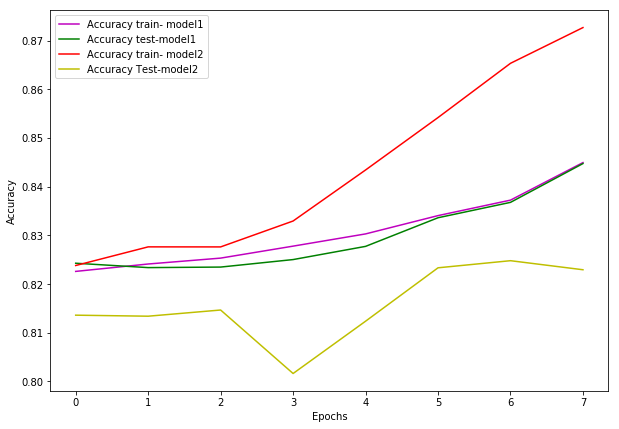

In [14]:
import matplotlib.pyplot as plt
       

accuracy_test = [0.82428998, 0.82339001, 0.82349998, 0.82503998, 0.82775003, 0.83363003, 0.83679003, 0.84476]
accuracy_train = [0.82261002, 0.82413, 0.82533997, 0.82779998, 0.83030999, 0.83407003, 0.83724999, 0.84495997]

accuracy_test1 = [0.81362002, 0.81340997, 0.81467997, 0.80164001, 0.81237999, 0.82334998, 0.82480999, 0.82295002]
accuracy_train1 = [0.82381999, 0.82765001, 0.82764, 0.83296001, 0.84344, 0.85421002, 0.86535001, 0.87269002]
fig = plt.figure(figsize=(10,7))
plt.plot(accuracy_train,'b', label='Accuracy train- model1')
plt.plot(accuracy_test ,'g', label='Accuracy test-model')
plt.plot(accuracy_train1,'b', label='Accuracy train- model2')
plt.plot(accuracy_test1 ,'g', label='Accuracy Test-model 2')

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

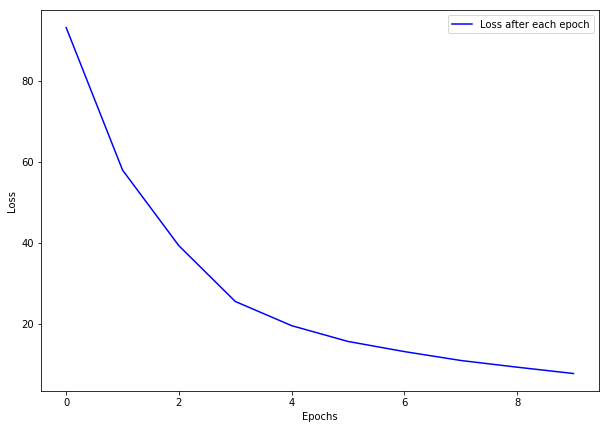

In [4]:
epoch = [93.0757, 57.9441, 39.2892, 25.5567,19.5921, 15.7022, 13.202, 11.0105, 9.35892, 7.79902]
fig = plt.figure(figsize=(10,7))
plt.plot(epoch,'b', label='Loss after each epoch')
# plt.plot(accuracy_test ,'g', label='Train Data')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
